## Bibliotecas

In [3]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns 

import warnings
warnings.filterwarnings("ignore")

DATASET_PATH = 'database/'

customers_path = f'{DATASET_PATH}olist_customers_dataset.csv'
geolocation_path = f'{DATASET_PATH}olist_geolocation_dataset.csv'
order_items_path = f'{DATASET_PATH}olist_order_items_dataset.csv'
order_payments_path = f'{DATASET_PATH}olist_order_payments_dataset.csv'
order_reviews_path = f'{DATASET_PATH}olist_order_reviews_dataset.csv'
orders_path = f'{DATASET_PATH}olist_orders_dataset.csv'
products_path = f'{DATASET_PATH}olist_products_dataset.csv'
sellers_path = f'{DATASET_PATH}olist_sellers_dataset.csv'
product_category_path = f'{DATASET_PATH}product_category_name_translation.csv'


## Carregando dados

In [4]:
bases = [
    {'nome': 'df_clientes', 'path': customers_path },
    {'nome': 'df_geolocalizacao', 'path': geolocation_path},
    {'nome': 'df_pedidos_itens', 'path': order_items_path},
    {'nome': 'df_pedidos_pagamentos', 'path': order_payments_path},
    {'nome': 'df_pedidos_reviews', 'path': order_reviews_path},
    {'nome': 'df_pedidos', 'path': orders_path},
    {'nome': 'df_produtos', 'path': products_path},
    {'nome': 'df_vendedores', 'path': sellers_path}]

for base in bases:
    globals()[base['nome']] = pd.read_csv(base['path'])

## Funções auxiliares 

In [5]:
def calcular_valores_nulos(df):
    resultados = {
        'coluna': [],
        'quantidade_nulos': [],
        'porcentagem_nulos': []
    }

    for coluna in df.columns:
        nulos = df[coluna].isnull().sum() 
        total = len(df[coluna])  
        porcentagem = (nulos / total) * 100 

        resultados['coluna'].append(coluna)
        resultados['quantidade_nulos'].append(nulos)
        resultados['porcentagem_nulos'].append(porcentagem)

    return pd.DataFrame(resultados)

In [6]:
def calcular_linhas_duplicadas(df):
    total_linhas = len(df)
    
    duplicadas = df.duplicated()
    
    quantidade_duplicadas = duplicadas.sum()
    
    porcentagem_duplicadas = (quantidade_duplicadas / total_linhas) * 100 if total_linhas > 0 else 0
    
    resultados = {
        'total_linhas': total_linhas,
        'quantidade_duplicadas': quantidade_duplicadas,
        'porcentagem_duplicadas': porcentagem_duplicadas
    }

    return pd.DataFrame([resultados])

## Análises Estatísticas

### Perguntas técnicas 

- Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?
- Há valores ausentes no conjunto de dados? Explique-os.
- Existem valores duplicadas nos conjuntos de dados?
- Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?
- Como as variáveis numéricas estão distribuídas?
- Existe alguma correlação entre as variáveis numéricas?
- Como os dados categóricos estão distribuídos?

### 1. Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?

In [7]:
datasets = {
    'df_clientes': df_clientes,
    'df_geolocalizacao': df_geolocalizacao,
    'df_pedidos_itens': df_pedidos_itens,
    'df_pedidos_pagamentos': df_pedidos_pagamentos,
    'df_pedidos_reviews': df_pedidos_reviews,
    'df_pedidos': df_pedidos,
    'df_produtos': df_produtos,
    'df_vendedores': df_vendedores
}

for nome, dataset in datasets.items():
    print(f'Analisando os tipos de variáveis no dataset {nome}.')
    print(dataset.dtypes, '\n')

Analisando os tipos de variáveis no dataset df_clientes.
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

Analisando os tipos de variáveis no dataset df_geolocalizacao.
geolocation_zip_code_prefix      int64
geolocation_lat                float64
geolocation_lng                float64
geolocation_city                object
geolocation_state               object
dtype: object 

Analisando os tipos de variáveis no dataset df_pedidos_itens.
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object 

Analisando os tipos de variáveis no dataset df_pedidos_pagamentos.
order_id                 object
payment_sequential        int64
payment_type             object
payment_installments

### 2. Quantidade de valores nulos nos datasets 

In [8]:
datasets = {
    'df_clientes': df_clientes,
    'df_geolocalizacao': df_geolocalizacao,
    'df_pedidos_itens': df_pedidos_itens,
    'df_pedidos_pagamentos': df_pedidos_pagamentos,
    'df_pedidos_reviews': df_pedidos_reviews,
    'df_pedidos': df_pedidos,
    'df_produtos': df_produtos,
    'df_vendedores': df_vendedores
}

for nome, dataset in datasets.items():
    print(f"Analisando o dataset: {nome}")
    display(calcular_valores_nulos(dataset))

Analisando o dataset: df_clientes


,coluna,quantidade_nulos,porcentagem_nulos
0,customer_id,0,0.0
1,customer_unique_id,0,0.0
2,customer_zip_code_prefix,0,0.0
3,customer_city,0,0.0
4,customer_state,0,0.0


Analisando o dataset: df_geolocalizacao


,coluna,quantidade_nulos,porcentagem_nulos
0,geolocation_zip_code_prefix,0,0.0
1,geolocation_lat,0,0.0
2,geolocation_lng,0,0.0
3,geolocation_city,0,0.0
4,geolocation_state,0,0.0


Analisando o dataset: df_pedidos_itens


,coluna,quantidade_nulos,porcentagem_nulos
0,order_id,0,0.0
1,order_item_id,0,0.0
2,product_id,0,0.0
3,seller_id,0,0.0
4,shipping_limit_date,0,0.0
5,price,0,0.0
6,freight_value,0,0.0


Analisando o dataset: df_pedidos_pagamentos


,coluna,quantidade_nulos,porcentagem_nulos
0,order_id,0,0.0
1,payment_sequential,0,0.0
2,payment_type,0,0.0
3,payment_installments,0,0.0
4,payment_value,0,0.0


Analisando o dataset: df_pedidos_reviews


,coluna,quantidade_nulos,porcentagem_nulos
0,review_id,0,0.000000
1,order_id,0,0.000000
2,review_score,0,0.000000
3,review_comment_title,87656,88.341530
4,review_comment_message,58247,58.702532
5,review_creation_date,0,0.000000
6,review_answer_timestamp,0,0.000000


Analisando o dataset: df_pedidos


,coluna,quantidade_nulos,porcentagem_nulos
0,order_id,0,0.000000
1,customer_id,0,0.000000
2,order_status,0,0.000000
3,order_purchase_timestamp,0,0.000000
4,order_approved_at,160,0.160899
5,order_delivered_carrier_date,1783,1.793023
6,order_delivered_customer_date,2965,2.981668
7,order_estimated_delivery_date,0,0.000000


Analisando o dataset: df_produtos


,coluna,quantidade_nulos,porcentagem_nulos
0,product_id,0,0.000000
1,product_category_name,610,1.851234
2,product_name_lenght,610,1.851234
3,product_description_lenght,610,1.851234
4,product_photos_qty,610,1.851234
5,product_weight_g,2,0.006070
6,product_length_cm,2,0.006070
7,product_height_cm,2,0.006070
8,product_width_cm,2,0.006070


Analisando o dataset: df_vendedores


,coluna,quantidade_nulos,porcentagem_nulos
0,seller_id,0,0.0
1,seller_zip_code_prefix,0,0.0
2,seller_city,0,0.0
3,seller_state,0,0.0


### 3. Existem valores repetidos nos conjuntos de dados?

In [9]:
datasets = {
    'df_clientes': df_clientes,
    'df_geolocalizacao': df_geolocalizacao,
    'df_pedidos_itens': df_pedidos_itens,
    'df_pedidos_pagamentos': df_pedidos_pagamentos,
    'df_pedidos_reviews': df_pedidos_reviews,
    'df_pedidos': df_pedidos,
    'df_produtos': df_produtos,
    'df_vendedores': df_vendedores
}

for nome, dataset in datasets.items():
    lista_colunas = dataset.columns.to_list()
    print(f'Analisando o dataset {nome}')
    for coluna in lista_colunas:
        print(coluna)
        display(calcular_linhas_duplicadas(dataset[coluna]))

Analisando o dataset df_clientes
customer_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,0,0.0


customer_unique_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,3345,3.363804


customer_zip_code_prefix


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,84447,84.921712


customer_city


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,95322,95.857845


customer_state


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,99414,99.972848


Analisando o dataset df_geolocalizacao
geolocation_zip_code_prefix


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,1000163,981148,98.09881


geolocation_lat


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,1000163,282803,28.275691


geolocation_lng


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,1000163,282550,28.250395


geolocation_city


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,1000163,992152,99.199031


geolocation_state


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,1000163,1000136,99.9973


Analisando o dataset df_pedidos_itens
order_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,13984,12.413671


order_item_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,112629,99.981358


product_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,79699,70.749223


seller_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,109555,97.252552


shipping_limit_date


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,19332,17.161119


price


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,106682,94.702175


freight_value


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,112650,105651,93.786951


Analisando o dataset df_pedidos_pagamentos
order_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,103886,4446,4.279691


payment_sequential


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,103886,103857,99.972085


payment_type


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,103886,103881,99.995187


payment_installments


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,103886,103862,99.976898


payment_value


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,103886,74809,72.010666


Analisando o dataset df_pedidos_reviews
review_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,814,0.820366


order_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,551,0.555309


review_score


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,99219,99.994961


review_comment_title


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,94696,95.436588


review_comment_message


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,63064,63.557204


review_creation_date


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,98588,99.359026


review_answer_timestamp


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99224,976,0.983633


Analisando o dataset df_pedidos
order_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,0,0.0


customer_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,0,0.0


order_status


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,99433,99.991955


order_purchase_timestamp


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,566,0.569182


order_approved_at


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,8707,8.755946


order_delivered_carrier_date


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,18422,18.525558


order_delivered_customer_date


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,3776,3.797226


order_estimated_delivery_date


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,99441,98982,99.53842


Analisando o dataset df_produtos
product_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,0,0.0


product_category_name


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32877,99.775424


product_name_lenght


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32884,99.796668


product_description_lenght


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,29990,91.01393


product_photos_qty


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32931,99.939304


product_weight_g


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,30746,93.308246


product_length_cm


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32851,99.696519


product_height_cm


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32848,99.687415


product_width_cm


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,32951,32855,99.708658


Analisando o dataset df_vendedores
seller_id


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,3095,0,0.0


seller_zip_code_prefix


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,3095,849,27.431341


seller_city


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,3095,2484,80.258481


seller_state


,total_linhas,quantidade_duplicadas,porcentagem_duplicadas
0,3095,3072,99.256866


### 4. Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?

In [10]:
datasets = {
    'df_clientes': df_clientes,
    'df_geolocalizacao': df_geolocalizacao,
    'df_pedidos_itens': df_pedidos_itens,
    'df_pedidos_pagamentos': df_pedidos_pagamentos,
    'df_pedidos_reviews': df_pedidos_reviews,
    'df_pedidos': df_pedidos,
    'df_produtos': df_produtos,
    'df_vendedores': df_vendedores
}

for nome, dataset in datasets.items():
    print(f"Analisando o dataset: {nome}")
    
    colunas_numericas = dataset.select_dtypes(include=['int', 'float'])

    if not colunas_numericas.empty:
        display(colunas_numericas.describe())
    else:
        print(f"Não há coluna numérica no dataset {nome}.\n")

Analisando o dataset: df_clientes


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Analisando o dataset: df_geolocalizacao


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


Analisando o dataset: df_pedidos_itens


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Analisando o dataset: df_pedidos_pagamentos


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Analisando o dataset: df_pedidos_reviews


,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Analisando o dataset: df_pedidos
Não há coluna numérica no dataset df_pedidos.

Analisando o dataset: df_produtos


,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Analisando o dataset: df_vendedores


,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


### 5. Como as variáveis numéricas estão distribuídas?

#### Configurando estilo dos gráficos 

In [11]:
# Ajustando estilo do gráfico 
sns.set_style("whitegrid")

# Ajustando o tamanho dos elementos no gráfico
sns.set_context("paper")

# Ajustando a paleta de cores  
paleta = sns.color_palette("YlGnBu_d")

#### df_clientes

In [12]:
colunas_numericas = df_clientes.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['customer_zip_code_prefix']

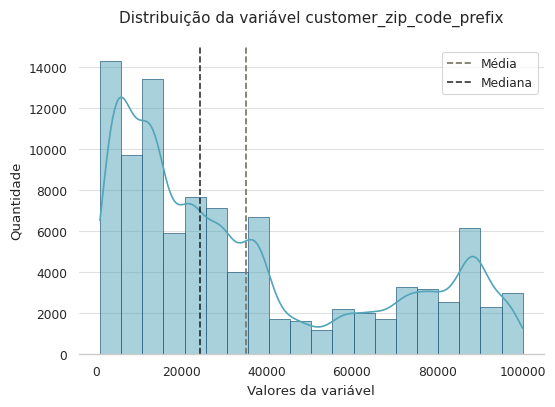

In [13]:
plt.figure(figsize= (6,4))

ax = sns.histplot(data=df_clientes, kde=True, x='customer_zip_code_prefix', bins=20, alpha = 0.5, \
                  stat = 'count', color=paleta[1], edgecolor=paleta[4], linewidth=.5, shrink=1)

mean_values = df_clientes['customer_zip_code_prefix'].mean()
median_values = df_clientes['customer_zip_code_prefix'].median()

ax.set_xlabel("Valores da variável")
ax.set_ylabel("Quantidade")
ax.set_title("Distribuição da variável customer_zip_code_prefix", y=1.05, fontsize = 11)
ax.tick_params(axis="x", grid_alpha = 0, labelleft=True)
ax.tick_params(axis="y", grid_alpha = 0.6)
ax.axvline(x=mean_values, color='#747264', linestyle='--', label='Média')
ax.axvline(x=median_values, color='black', linestyle='--', label='Mediana', alpha=.8)
# ax.annotate(str(round(mean_values, 1)), xy=(mean_values, 0), xytext=(mean_values, 0), ha='left',va='top',fontsize=8, color='#747264')
# ax.annotate(str(round(median_values, 1)), xy=(median_values, 0), xytext=(median_values, 0), ha='right',va='top',fontsize=8, color='black', alpha=.8)

plt.legend()
sns.despine(left=True)
# plt.savefig("distribuicao_df_clientes.png", transparent=True)
plt.show()

#### df_geolocalizacao

In [14]:
colunas_numericas = df_geolocalizacao.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng']

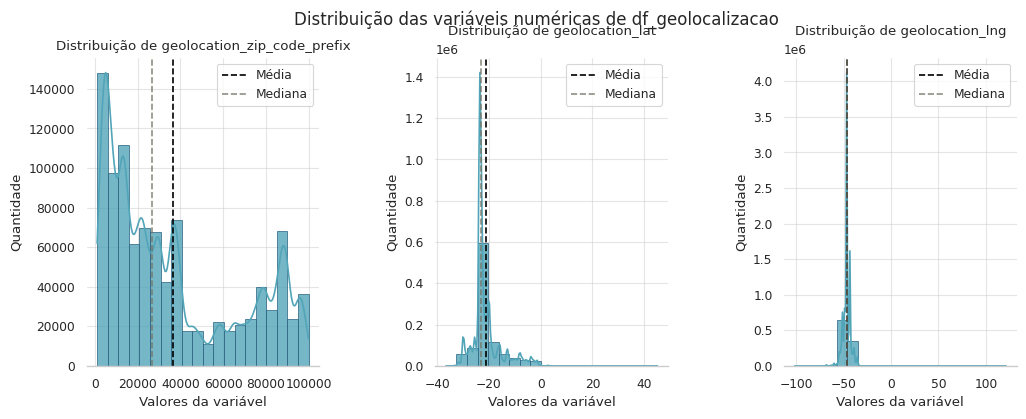

In [15]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição das variáveis numéricas de df_geolocalizacao', y=1 , fontsize=12)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(1,3, i)
    mean_values=df_geolocalizacao[q].mean()
    median_values=df_geolocalizacao[q].median()
    sns.histplot(df_geolocalizacao[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.8, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_geolocalizacao.png", transparent=True)
plt.show()

#### df_pedidos_itens

In [16]:
colunas_numericas = df_pedidos_itens.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['order_item_id', 'price', 'freight_value']

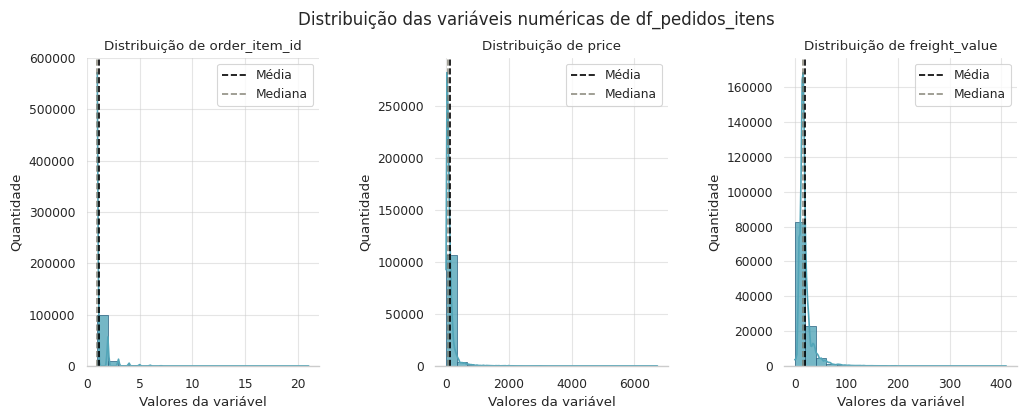

In [17]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição das variáveis numéricas de df_pedidos_itens', y=1 , fontsize=12)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(1,3, i)
    mean_values=df_pedidos_itens[q].mean()
    median_values=df_pedidos_itens[q].median()
    sns.histplot(df_pedidos_itens[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.8, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_pedidos_itens.png", transparent=True)
plt.show()

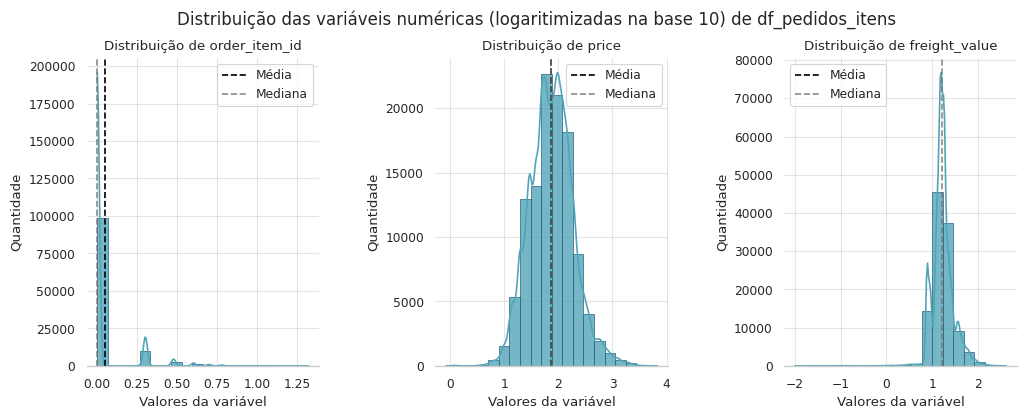

In [18]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição das variáveis numéricas (logaritimizadas na base 10) de df_pedidos_itens', y=1 , fontsize=12)

df_pedidos_itens_log = df_pedidos_itens[colunas_numericas].apply(np.log10)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(1,3, i)
    mean_values=df_pedidos_itens_log[q].mean()
    median_values=df_pedidos_itens_log[q].median()
    sns.histplot(df_pedidos_itens_log[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.8, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_clientes_log.png", transparent=True)
plt.show()

#### df_pedidos_pagamentos

In [19]:
colunas_numericas = df_pedidos_pagamentos.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['payment_sequential', 'payment_installments', 'payment_value']

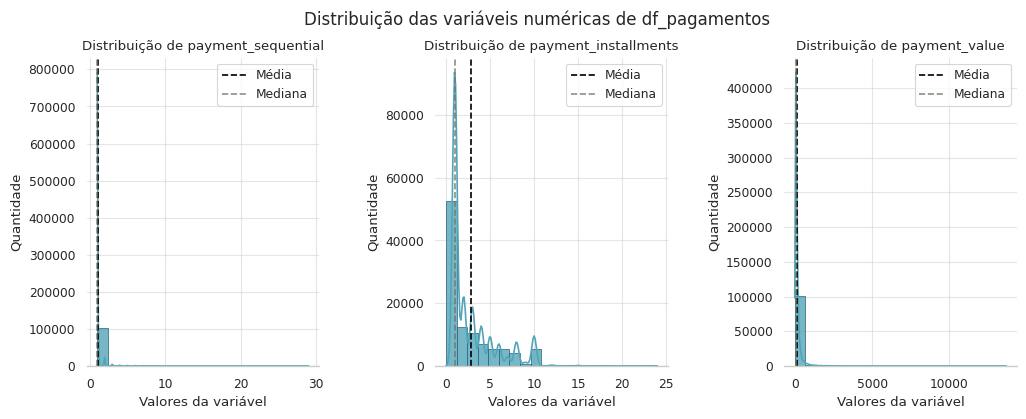

In [20]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição das variáveis numéricas de df_pagamentos', y=1 , fontsize=12)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(1,3, i)
    mean_values=df_pedidos_pagamentos[q].mean()
    median_values=df_pedidos_pagamentos[q].median()
    sns.histplot(df_pedidos_pagamentos[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.8, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_pagamentos.png", transparent=True)
plt.show()

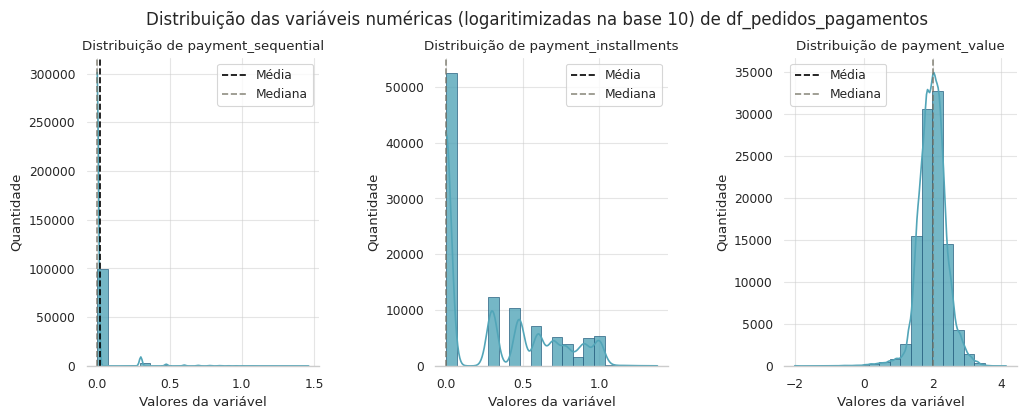

In [21]:
plt.figure(figsize=(12,4))
plt.suptitle('Distribuição das variáveis numéricas (logaritimizadas na base 10) de df_pedidos_pagamentos', y=1 , fontsize=12)

df_pedidos_pagamentos_log = df_pedidos_pagamentos[colunas_numericas].apply(np.log10)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(1,3, i)
    mean_values=df_pedidos_pagamentos_log[q].mean()
    median_values=df_pedidos_pagamentos_log[q].median()
    sns.histplot(df_pedidos_pagamentos_log[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.8, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_pagamentos_log.png", transparent=True)
plt.show()

#### df_pedidos_reviews

In [22]:
colunas_numericas = df_pedidos_reviews.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['review_score']

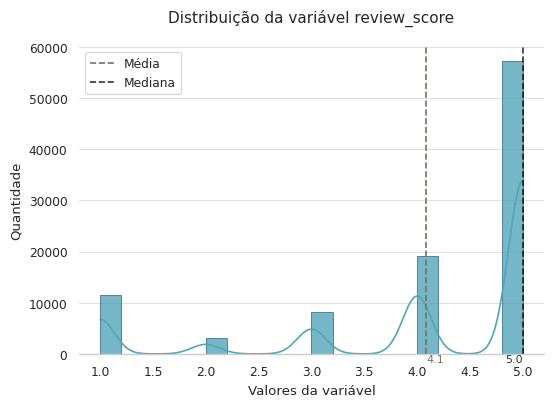

In [23]:
plt.figure(figsize= (6,4))

ax = sns.histplot(data=df_pedidos_reviews, kde=True, x='review_score', bins=20, alpha = 0.8, \
                  stat = 'count', color=paleta[1], edgecolor=paleta[4], linewidth=.5, shrink=1)

mean_values = df_pedidos_reviews['review_score'].mean()
median_values = df_pedidos_reviews['review_score'].median()

ax.set_xlabel("Valores da variável")
ax.set_ylabel("Quantidade")
ax.set_title("Distribuição da variável review_score", y=1.05, fontsize = 11)
ax.tick_params(axis="x", grid_alpha = 0, labelleft=True)
ax.tick_params(axis="y", grid_alpha = 0.6)
ax.axvline(x=mean_values, color='#747264', linestyle='--', label='Média')
ax.axvline(x=median_values, color='black', linestyle='--', label='Mediana', alpha=.8)
ax.annotate(str(round(mean_values, 1)), xy=(mean_values, 0), xytext=(mean_values, 0), ha='left',va='top',fontsize=8, color='#747264')
ax.annotate(str(round(median_values, 1)), xy=(median_values, 0), xytext=(median_values, 0), ha='right',va='top',fontsize=8, color='black', alpha=.8)

plt.legend()
sns.despine(left=True)
# plt.savefig("distribuicao_df_pedidos_reviews.png", transparent=True)
plt.show()

#### df_produtos

In [24]:
colunas_numericas = df_produtos.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm']

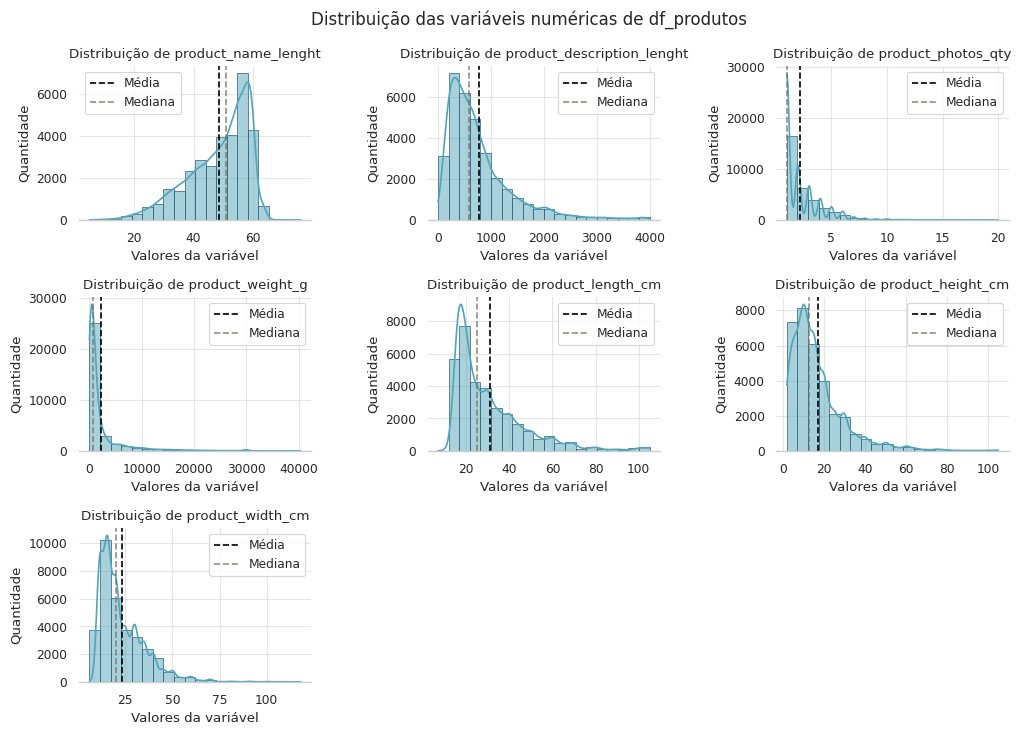

In [25]:
plt.figure(figsize=(12,8))
plt.suptitle('Distribuição das variáveis numéricas de df_produtos', y=0.95 , fontsize=12)

for i, q in enumerate(colunas_numericas, 1):
    plt.subplot(3,3, i)
    mean_values=df_produtos[q].mean()
    median_values=df_produtos[q].median()
    sns.histplot(df_produtos[q], kde= True, color=paleta[1], edgecolor=paleta[4], linewidth=.5, alpha=0.5, stat='count', bins=20)
    sns.despine(left=True)
    plt.ylabel("Quantidade")
    plt.xlabel('Valores da variável')
    plt.axvline(x=mean_values, color='black', linestyle='--', label='Média')
    plt.axvline(x=median_values, color='#747264', linestyle='--', label='Mediana', alpha=.8)
    plt.grid(True, alpha=0.5)  
    plt.title(f'Distribuição de {q}') 
    plt.legend()

plt.subplots_adjust(hspace=0.5, wspace=0.5)
# plt.savefig("distribuicao_df_produtos.png", transparent=True)
plt.show()

#### df_vendedores

In [26]:
colunas_numericas = df_vendedores.select_dtypes(include = ['int', 'float']).columns.to_list()
colunas_numericas

['seller_zip_code_prefix']

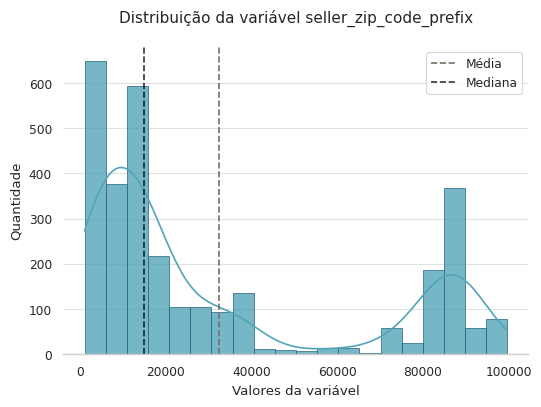

In [27]:
plt.figure(figsize= (6,4))

ax = sns.histplot(data=df_vendedores, kde=True, x='seller_zip_code_prefix', bins=20, alpha = 0.8, \
                  stat = 'count', color=paleta[1], edgecolor=paleta[4], linewidth=.5, shrink=1)

mean_values = df_vendedores['seller_zip_code_prefix'].mean()
median_values = df_vendedores['seller_zip_code_prefix'].median()

ax.set_xlabel("Valores da variável")
ax.set_ylabel("Quantidade")
ax.set_title("Distribuição da variável seller_zip_code_prefix", y=1.05, fontsize = 11)
ax.tick_params(axis="x", grid_alpha = 0, labelleft=True)
ax.tick_params(axis="y", grid_alpha = 0.6)
ax.axvline(x=mean_values, color='#747264', linestyle='--', label='Média')
ax.axvline(x=median_values, color='black', linestyle='--', label='Mediana', alpha=.8)
# ax.annotate(str(round(mean_values, 1)), xy=(mean_values, 0), xytext=(mean_values, 0), ha='left',va='top',fontsize=8, color='#747264')
# ax.annotate(str(round(median_values, 1)), xy=(median_values, 0), xytext=(median_values, 0), ha='right',va='top',fontsize=8, color='black', alpha=.8)

plt.legend()
sns.despine(left=True)
# plt.savefig("distribuicao_df_vendedores.png", transparent=True)
plt.show()

Observação: É interessante ver quais as regiões associadas aos valores de zip code menores que 20.000, por exemplo.

### 6. Existe alguma correlação entre as variáveis numéricas?

#### Combinando os datasets para análise de correlação 

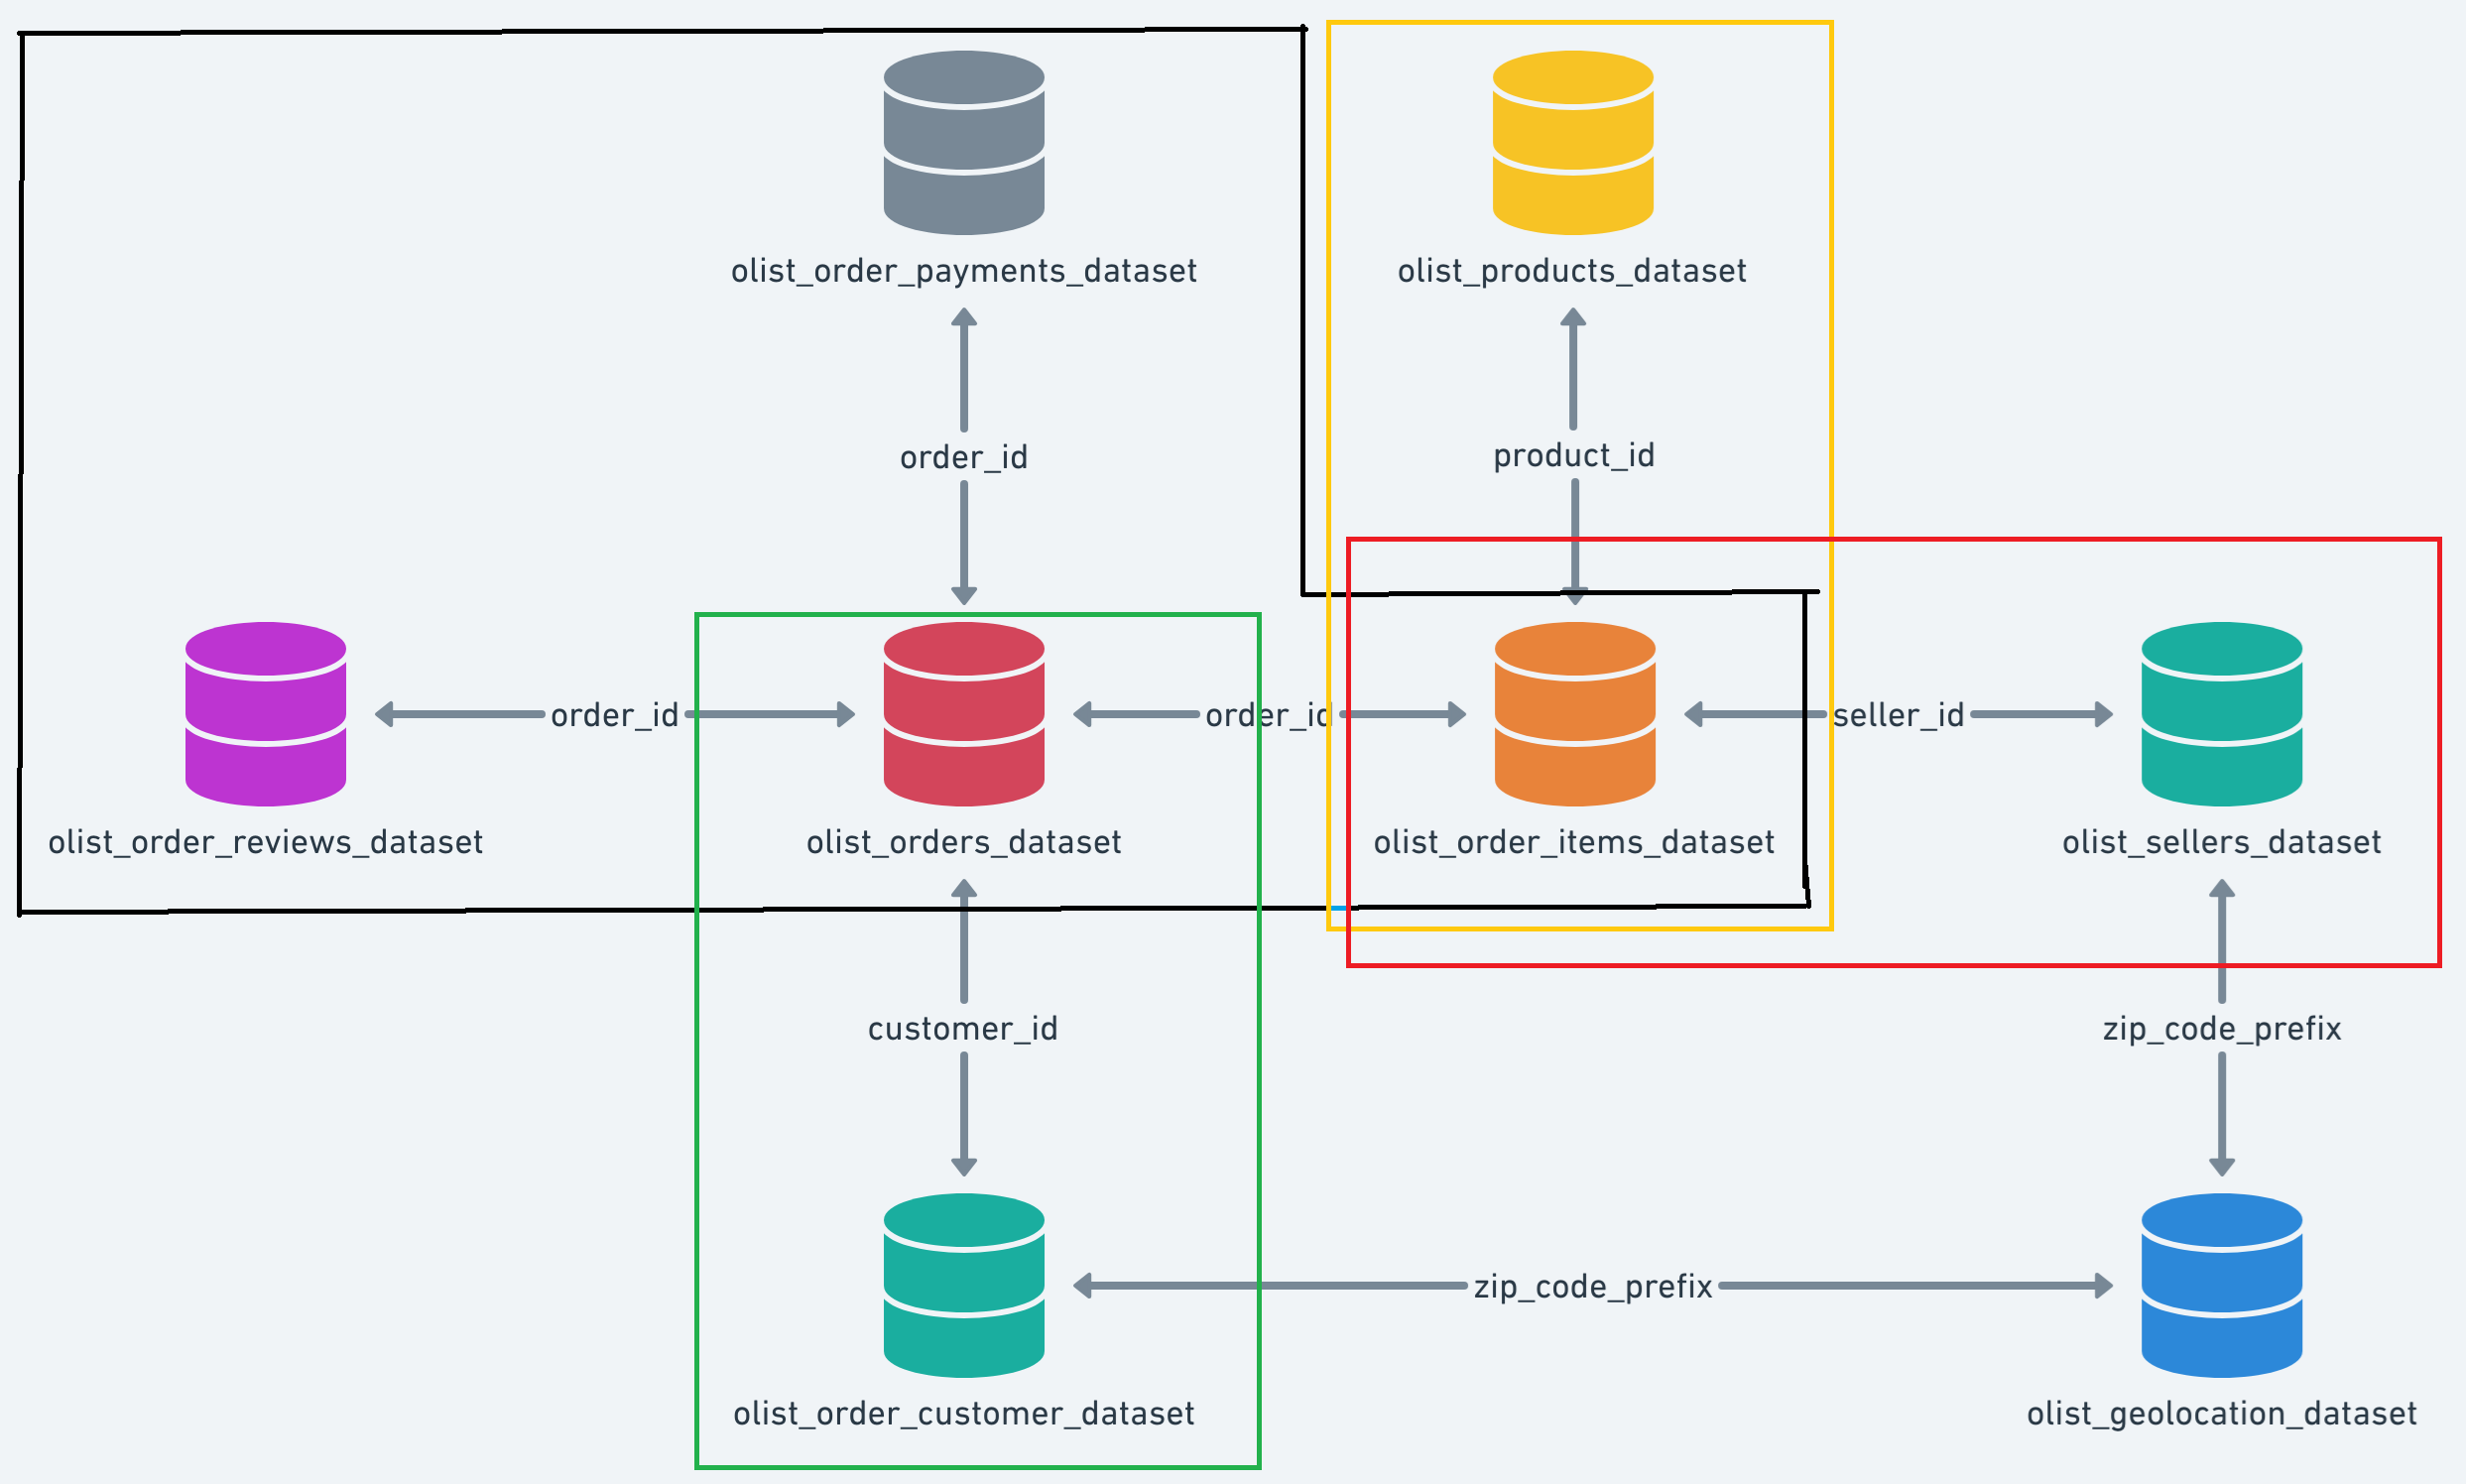

##### Merge dos datasets dentro da marcação preta 

In [28]:
reviews_pedidos = pd.merge(df_pedidos_reviews, df_pedidos, how = 'inner', on = 'order_id')
reviews_pedidos_pagamentos = pd.merge(reviews_pedidos, df_pedidos_pagamentos, how = 'inner', on = 'order_id')
reviews_pedidos_pagamentos_itens = pd.merge(reviews_pedidos_pagamentos, df_pedidos_itens, how = 'inner', on = 'order_id')

##### Merge dos datasets dentro da marcação verde

In [29]:
pedidos_clientes = pd.merge(df_pedidos, df_clientes, how = 'inner', on = 'customer_id')

##### Merge dos datasets dentro da marcação amarela

In [30]:
produtos_itens = pd.merge(df_produtos, df_pedidos_itens, how = 'inner', on = 'product_id')

##### Merge dos datasets dentro da marcação vermelha

In [31]:
pedidos_itens_vendedores = pd.merge(df_pedidos_itens, df_vendedores, how = 'inner', on = 'seller_id')

##### Combinando todos os datasets selecionados nos merges anteriores

In [32]:
combinacao_01 = pd.merge(reviews_pedidos_pagamentos_itens, df_produtos, how= 'inner', on = 'product_id')
combinacao_02 = pd.merge(combinacao_01, df_clientes, how = 'inner', on = 'customer_id')
combinacao_03 = pd.merge(combinacao_02, df_vendedores, how = 'inner', on = 'seller_id')

In [33]:
variaveis_numericas = combinacao_03.select_dtypes(include = ['int', 'float']).columns.to_list()
variaveis_numericas.remove('order_item_id')

In [34]:
correlacao_pearson = combinacao_03[variaveis_numericas].corr(method='pearson')

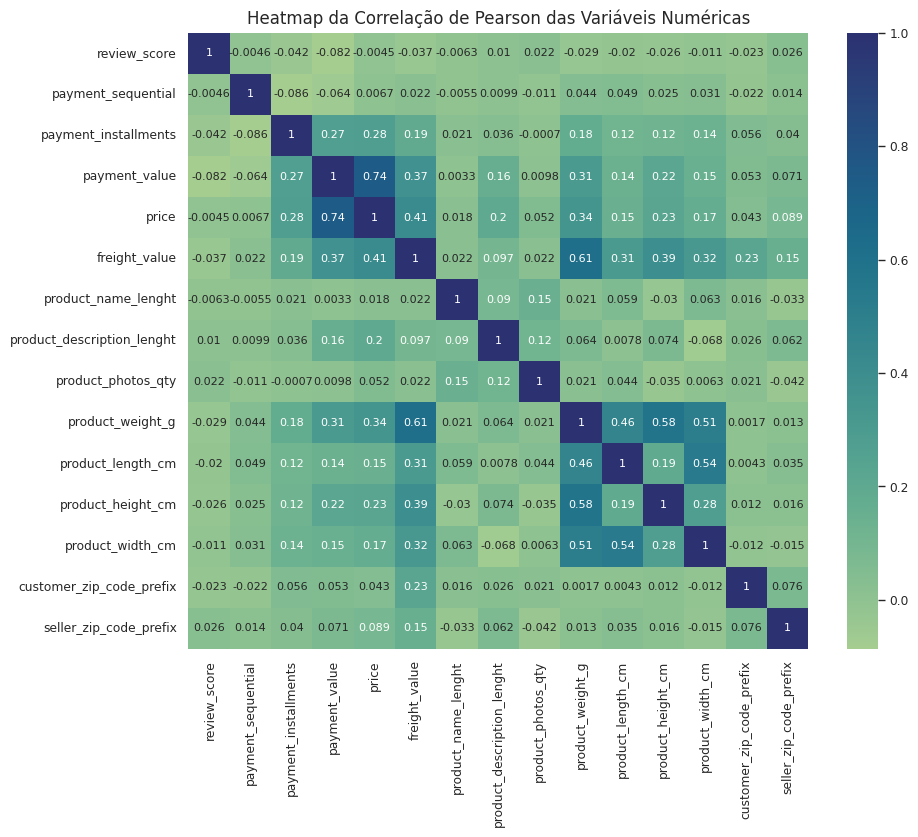

In [35]:
plt.figure(figsize=(10, 8))
plt.title('Heatmap da Correlação de Pearson das Variáveis Numéricas', fontsize = 12)
sns.heatmap(correlacao_pearson, annot = True, cmap = 'crest', annot_kws={"size": 8})
plt.show()

In [36]:
correlacao_spearman = combinacao_03[variaveis_numericas].corr(method='spearman')

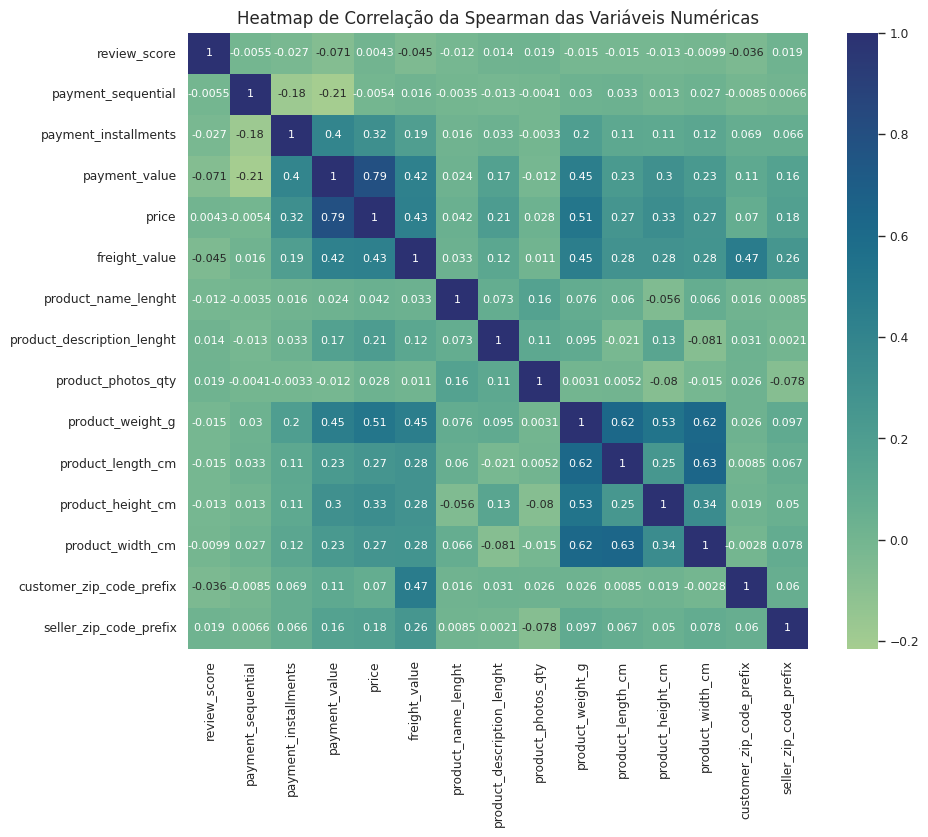

In [37]:
plt.figure(figsize=(10, 8))
plt.title('Heatmap de Correlação da Spearman das Variáveis Numéricas', fontsize = 12)
sns.heatmap(correlacao_spearman, annot = True, cmap = 'crest', annot_kws={"size": 8})
plt.show()

### 7. Como os dados categóricos estão distribuídos?

#### Estatísticas descritivas das variáveis categóricas 

In [38]:
datasets = {
    'df_clientes': df_clientes,
    'df_geolocalizacao': df_geolocalizacao,
    'df_pedidos_itens': df_pedidos_itens,
    'df_pedidos_pagamentos': df_pedidos_pagamentos,
    'df_pedidos_reviews': df_pedidos_reviews,
    'df_pedidos': df_pedidos,
    'df_produtos': df_produtos,
    'df_vendedores': df_vendedores
}

for nome, dataset in datasets.items():
    colunas_objeto = dataset.select_dtypes(include = 'object').columns.to_list()
    print(f'Analisando o dataset {nome}')
    display(dataset[colunas_objeto].describe())

Analisando o dataset df_clientes


,customer_id,customer_unique_id,customer_city,customer_state
count,99441,99441,99441,99441
unique,99441,96096,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,sao paulo,SP
freq,1,17,15540,41746


Analisando o dataset df_geolocalizacao


,geolocation_city,geolocation_state
count,1000163,1000163
unique,8011,27
top,sao paulo,SP
freq,135800,404268


Analisando o dataset df_pedidos_itens


,order_id,product_id,seller_id,shipping_limit_date
count,112650,112650,112650,112650
unique,98666,32951,3095,93318
top,8272b63d03f5f79c56e9e4120aec44ef,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23
freq,21,527,2033,21


Analisando o dataset df_pedidos_pagamentos


,order_id,payment_type
count,103886,103886
unique,99440,5
top,fa65dad1b0e818e3ccc5cb0e39231352,credit_card
freq,29,76795


Analisando o dataset df_pedidos_reviews


,review_id,order_id,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,11568,40977,99224,99224
unique,98410,98673,4527,36159,636,98248
top,4548534449b1f572e357211b90724f1b,03c939fd7fd3b38f8485a0f95798f1f6,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,423,230,463,4


Analisando o dataset df_pedidos


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Analisando o dataset df_produtos


,product_id,product_category_name
count,32951,32341
unique,32951,73
top,106392145fca363410d287a815be6de4,cama_mesa_banho
freq,1,3029


Analisando o dataset df_vendedores


,seller_id,seller_city,seller_state
count,3095,3095,3095
unique,3095,611,23
top,9e25199f6ef7e7c347120ff175652c3b,sao paulo,SP
freq,1,694,1849


#### df_clientes

In [39]:
colunas_objeto = df_clientes.select_dtypes(include='object').columns.to_list()
colunas_objeto

['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']

In [40]:
df_clientes[colunas_objeto].nunique() < 30

customer_id           False
customer_unique_id    False
customer_city         False
customer_state         True
dtype: bool

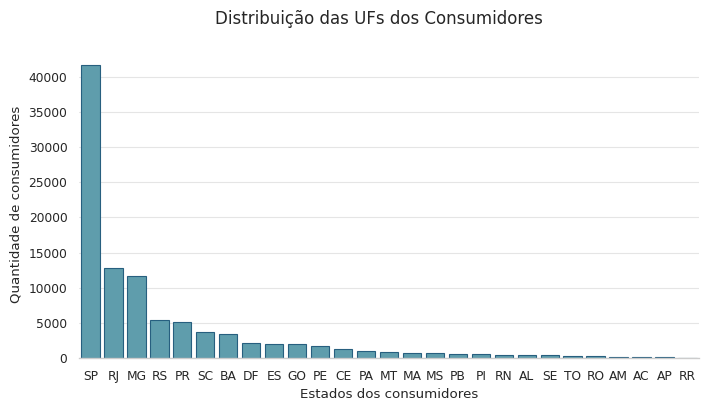

In [41]:
# Plotando a variável com menos de 30 categorias
plt.figure(figsize=(8, 4))
plt.suptitle('Distribuição das UFs dos Consumidores', fontsize=12)

categorias_quantidades = df_clientes['customer_state'].value_counts()
sns.countplot(data=df_clientes, x='customer_state', color=paleta[1], edgecolor=paleta[4], alpha = 1, order = categorias_quantidades.index)

plt.ylabel("Quantidade de consumidores")
plt.xlabel("Estados dos consumidores")
plt.grid(axis='y', alpha=0.5)

sns.despine(left=True)
# plt.savefig("distribuicao_df_consumidores_ufs.png", transparent=True)
plt.show()

#### df_pedidos_pagamentos

In [42]:
colunas_objeto = df_pedidos_pagamentos.select_dtypes(include='object').columns.to_list()
colunas_objeto

['order_id', 'payment_type']

In [43]:
df_pedidos_pagamentos[colunas_objeto].nunique() < 30

order_id        False
payment_type     True
dtype: bool

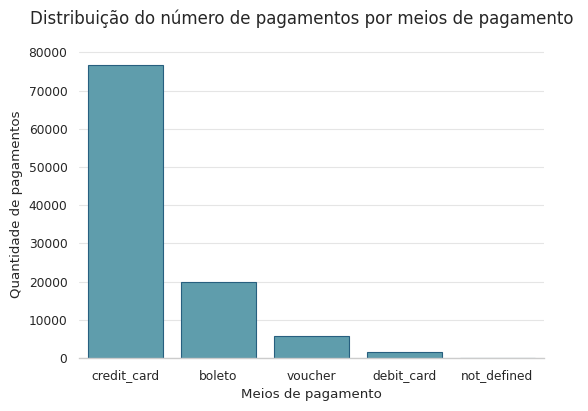

In [44]:
# Plotando a variável com menos de 30 categorias
plt.figure(figsize=(6, 4))
plt.suptitle('Distribuição do número de pagamentos por meios de pagamento ', fontsize=12)

sns.countplot(data=df_pedidos_pagamentos, x='payment_type', color=paleta[1], edgecolor=paleta[4], alpha = 1)

plt.ylabel("Quantidade de pagamentos")
plt.xlabel("Meios de pagamento")
plt.grid(axis='y', alpha=0.5)

sns.despine(left=True)
# plt.savefig("distribuicao_df_pagamentos_tipos.png", transparent=True)
plt.show()

#### df_pedidos_reviews

In [45]:
colunas_objeto = df_pedidos_reviews.select_dtypes(include='object').columns.to_list()
colunas_objeto

['review_id',
 'order_id',
 'review_comment_title',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp']

In [46]:
df_pedidos_reviews[colunas_objeto].nunique() 

review_id                  98410
order_id                   98673
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [47]:
df_pedidos_reviews.head(5)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [48]:
df_pedidos_reviews['review_creation_date'] = df_pedidos_reviews['review_creation_date'].str.replace('00:00:00', '', regex=False)

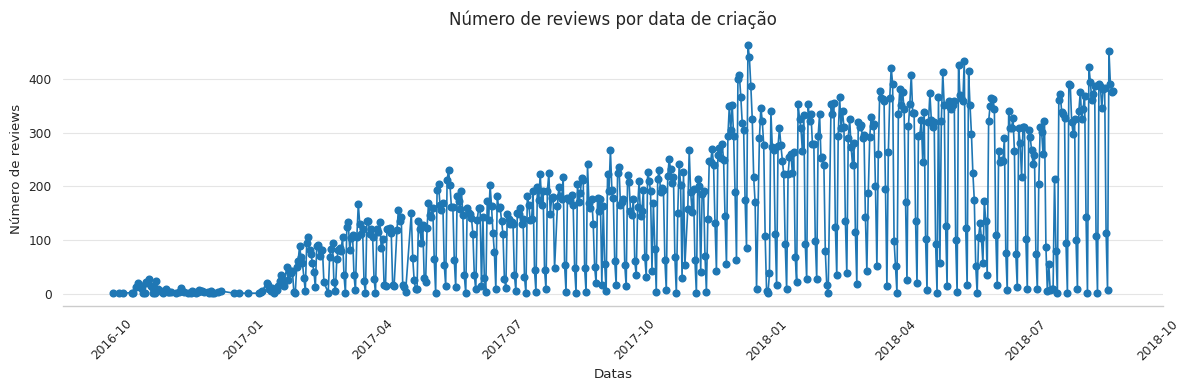

In [49]:
contagem = df_pedidos_reviews['review_creation_date'].value_counts()

df_contagem = contagem.reset_index()
df_contagem.columns = ['review_creation_date', 'count']
df_contagem['review_creation_date'] = df_contagem['review_creation_date'].str.split(' ').str[0]
df_contagem['review_creation_date'] = pd.to_datetime(df_contagem['review_creation_date'], errors='coerce')
df_contagem = df_contagem.sort_values('review_creation_date')

plt.figure(figsize=(12, 4))
plt.plot(df_contagem['review_creation_date'], df_contagem['count'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Datas')
plt.ylabel('Número de reviews')
plt.title('Número de reviews por data de criação', fontsize = 12)
plt.grid(axis='y', alpha=0.5)
plt.grid(axis='x', alpha=0)

sns.despine(left=True)
plt.tight_layout()
plt.show()

#### df_pedidos

In [50]:
colunas_objeto = df_pedidos.select_dtypes(include='object').columns.to_list()
colunas_objeto

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [51]:
df_pedidos[colunas_objeto].nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

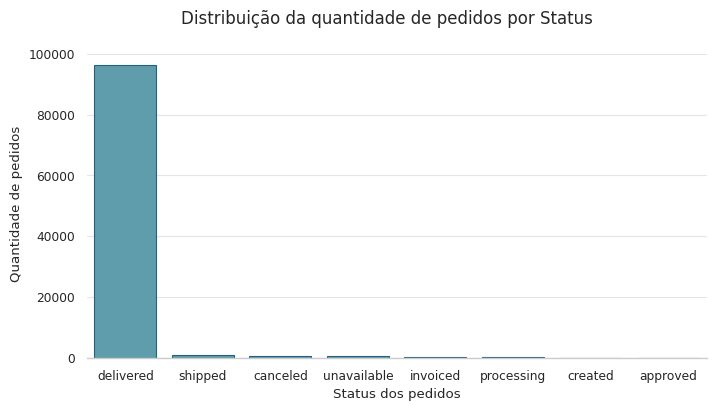

In [52]:
# Plotando a variável com menos de 30 categorias
plt.figure(figsize=(8, 4))
plt.suptitle('Distribuição da quantidade de pedidos por Status', fontsize=12)

categorias_quantidades = df_pedidos['order_status'].value_counts()
sns.countplot(data=df_pedidos, x='order_status', color=paleta[1], edgecolor=paleta[4], alpha = 1, order = categorias_quantidades.index)

plt.ylabel("Quantidade de pedidos")
plt.xlabel("Status dos pedidos")
plt.grid(axis='y', alpha=0.5)

sns.despine(left=True)
# plt.savefig("distribuicao_df_pedidos_status.png", transparent=True)
plt.show()

#### df_produtos

In [53]:
colunas_objeto = df_produtos.select_dtypes(include='object').columns.to_list()
colunas_objeto

['product_id', 'product_category_name']

In [54]:
df_produtos[colunas_objeto].nunique() 

product_id               32951
product_category_name       73
dtype: int64

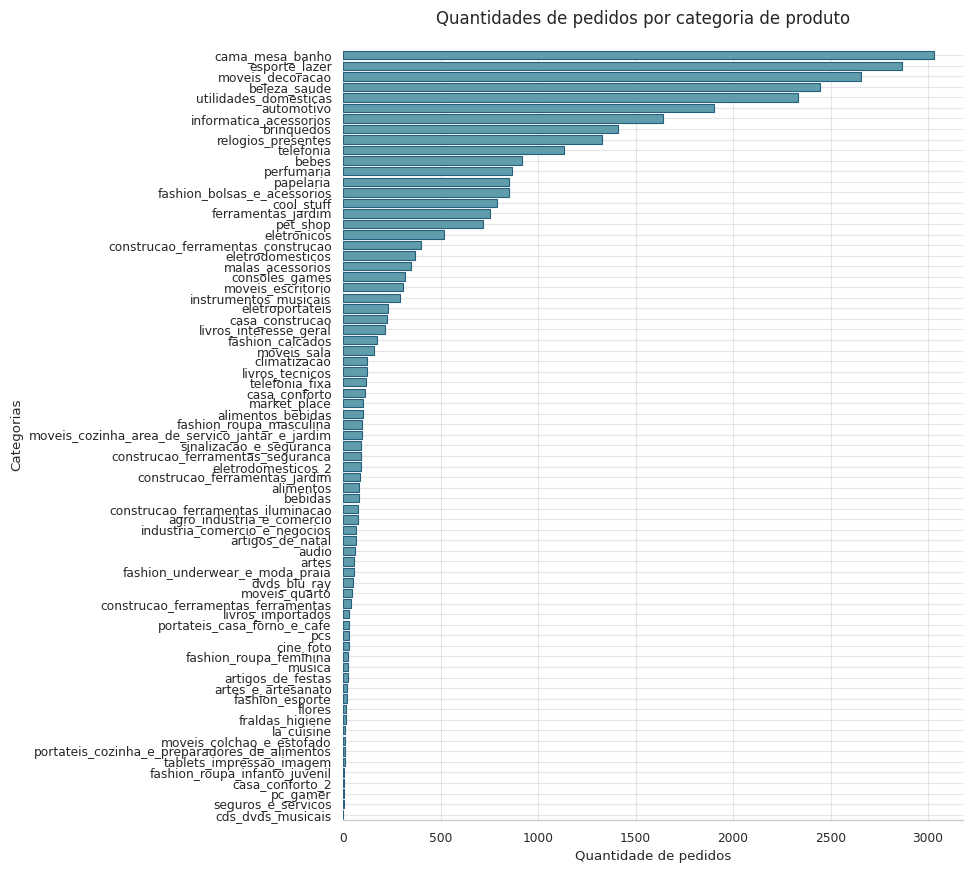

In [55]:
# Plotando a variável com menos de 80 categorias
plt.figure(figsize=(8, 10))
plt.suptitle('Quantidades de pedidos por categoria de produto', y=0.92, fontsize=12)

categoria_quantidades = df_produtos['product_category_name'].value_counts()
sns.countplot(data=df_produtos, y='product_category_name', color=paleta[1], edgecolor=paleta[4],\
              alpha = 1, orient = 'v', order=categoria_quantidades.index)

plt.ylabel("Categorias")
plt.xlabel("Quantidade de pedidos")
plt.grid(axis='y', alpha=0.5)
plt.grid(axis = 'x', alpha = 0.5)
sns.despine(left=True)
# plt.savefig("distribuicao_df_prdutos_categorias.png", transparent=True)
plt.show()

- Algumas categorias se repetem. Por exemplo: 'casa_construcao', 'construcao_ferramentas_construcao' e 'construcao_ferramentas_ferramentas'; 'eletronicos' e 'telefonia'.
- Podemos agrupar as categorias parecidas para fazer um gráfico mais enxuto.

#### df_vendedores

In [56]:
colunas_objeto = df_vendedores.select_dtypes(include='object').columns.to_list()
colunas_objeto

['seller_id', 'seller_city', 'seller_state']

In [57]:
df_vendedores[colunas_objeto].nunique()

seller_id       3095
seller_city      611
seller_state      23
dtype: int64

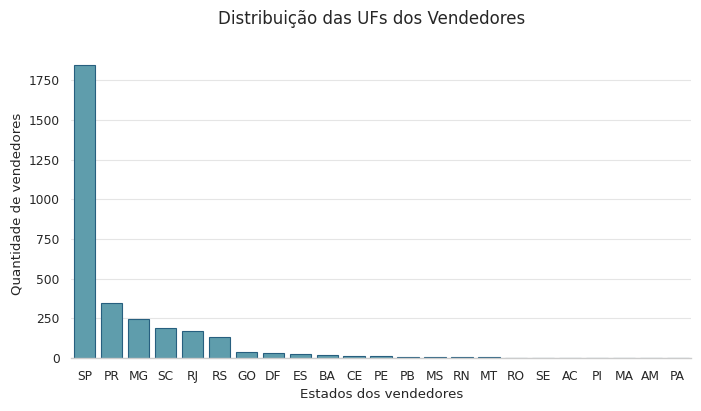

In [58]:
# Plotando a variável com menos de 30 categorias
plt.figure(figsize=(8, 4))
plt.suptitle('Distribuição das UFs dos Vendedores', fontsize=12)

categorias_quantidades = df_vendedores['seller_state'].value_counts()
sns.countplot(data=df_vendedores, x='seller_state', color=paleta[1], edgecolor=paleta[4], alpha = 1, order = categorias_quantidades.index)

plt.ylabel("Quantidade de vendedores")
plt.xlabel("Estados dos vendedores")
plt.grid(axis='y', alpha=0.5)

sns.despine(left=True)
# plt.savefig("distribuicao_df_vendedores_ufs.png", transparent=True)
plt.show()